## Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_study_results_df = pd.merge(study_results, mouse_metadata, on=["Mouse ID"])
3
# Display the data table for preview
combined_study_results_df.head(30)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [2]:
# Checking the number of mice.
total_mice = combined_study_results_df["Mouse ID"].nunique()
total_mice

249

In [3]:
# Optional: Get all the data for the duplicate mouse ID.
#duplicate_rows = combined_study_results_df[combined_study_results_df.duplicated()]
#duplicate_rows

#duplicate_rows = combined_study_results_df[combined_study_results_df.duplicated(subset=["Mouse ID"], keep=False)]
#print(duplicate_rows)

duplicate_mouse_ids = combined_study_results_df.loc[combined_study_results_df.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids



array(['g989'], dtype=object)

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_combined_df =  combined_study_results_df[combined_study_results_df["Mouse ID"].isin(duplicate_mouse_ids)==False]

cleaned_combined_df.shape

#cleaned_combined_df = combined_study_results_df.drop_duplicates(subset=["Mouse ID"], keep="first")




(1880, 8)

In [5]:
## Checking the number of mice in the clean DataFrame
total_mice_cleaned = cleaned_combined_df["Mouse ID"].nunique()
total_mice_cleaned
#total_mice_cleaned = cleaned_combined_df["Mouse ID"].nunique()
#print(total_mice_cleaned)


248

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


mean_tumor_vol_drug_regimen = cleaned_combined_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_tumor_vol_drug_regimen = cleaned_combined_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
std_tumor_vol_drug_regimen = cleaned_combined_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
var_tumor_vol_drug_regimen = cleaned_combined_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
sem_tumor_vol_drug_regimen = cleaned_combined_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()


summary_statistics_df = pd.DataFrame({"Mean Tumor Volume": mean_tumor_vol_drug_regimen, "Median Tumor Volume": median_tumor_vol_drug_regimen, " Tumor Volume Variance": var_tumor_vol_drug_regimen, 
                                     "Tumor Volume Std. Dev.": std_tumor_vol_drug_regimen, "Tumor Volume Std. Err.": sem_tumor_vol_drug_regimen})
summary_statistics_df.head(15)

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

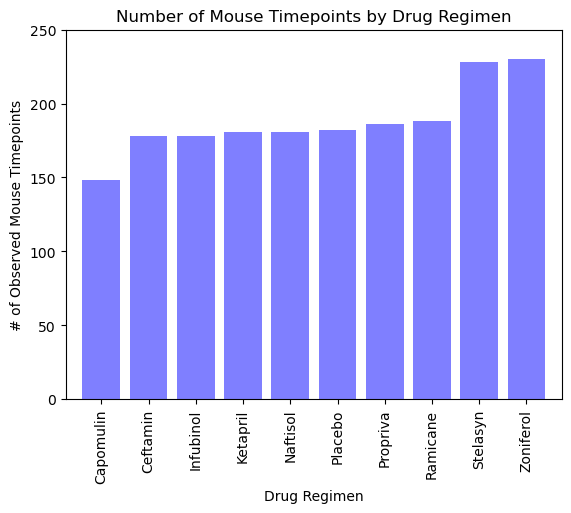

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

mouse_id_timepoint_counts = cleaned_combined_df.groupby(["Drug Regimen"])["Mouse ID"].count().sort_values()

x_axis = np.arange(len(mouse_id_timepoint_counts))
plt.bar(x_axis, mouse_id_timepoint_counts, color ='blue', alpha=0.5, align="center")
tick_locations =[value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"], rotation = 90)
plt.xlim(-0.75,len(x_axis)-0.25)
plt.ylim(0,max(mouse_id_timepoint_counts)+20)
plt.title("Number of Mouse Timepoints by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()
          

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


In [10]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart


In [11]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart


## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [13]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds


In [14]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [15]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [16]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
